# HW4_Part 1 Statistic Distribution

In [24]:
# Stating all the packages here
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np
import random
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm', 'random', 'std']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Borrowed the skeleton from:

Written by Federica B. Bianco @fedhere
 NYU CUSP PUI

 Assignment 1 Homework 4

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [25]:
#Setting a seed here so this can be reproducible
np.random.seed(12345)

## Choose which distributions to use

In [26]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## And which mean to give it; the mean will stay the same for all 5 distributions

In [27]:
mymean = 10

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](chisq1.png)

![2](chisq2.png)

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [28]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


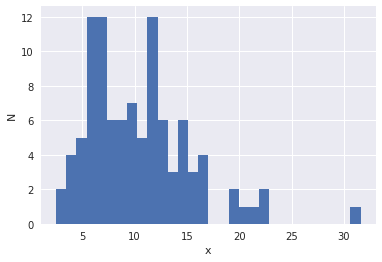

In [29]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Moved the numpy import to the very top. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)
# Import numpy as np

md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 10, N=100

## let numpy calculate what the mean and stdev of this distribution are

In [30]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 10.37, standard deviation: 4.93


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

In [31]:
mysize = (2000 / (np.array(range(1, 101)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20] (100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


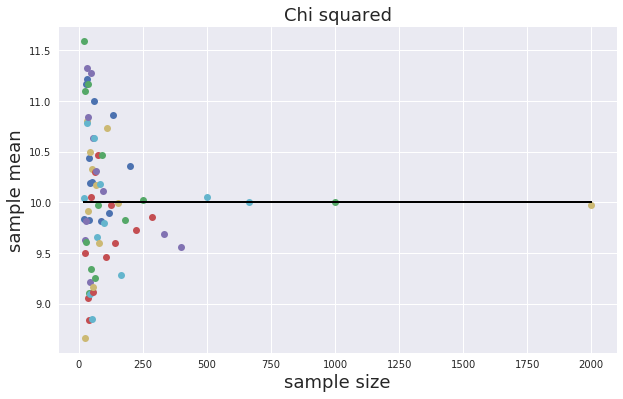

In [32]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: [describe what you see and how it relates to the law of large numbers]
According to the law of large numbers, we can see from the plot that the larger the sample size is, the closer its mean is to the expected mean. 

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


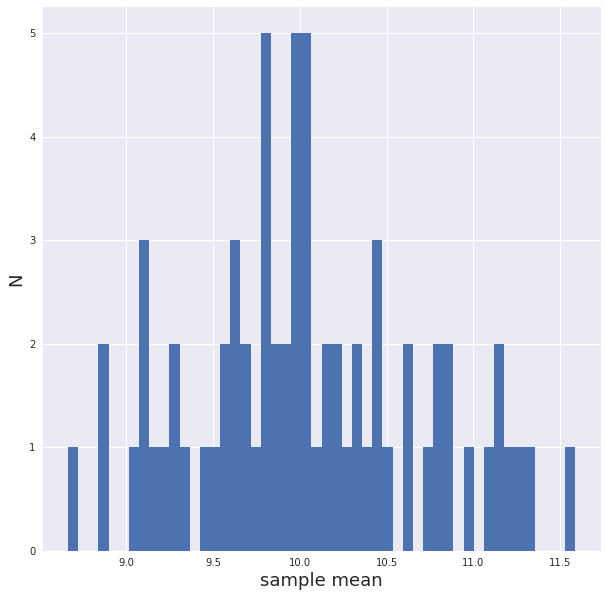

In [33]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=50)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: 
This histogram is not perfectly bell-shaped comparing to a normal distribution. It is a little bit right-skewed. Based on the Central Limit Theorem, this can be due to the size of the sample. 

# Do it for the Normal distribution


In [34]:
##your code here...
random.seed(12345)
sizeND = (np.random.rand(100) * 1882).astype(int)
print("Sample Size List: %s Shape: %s"%(sizeND, sizeND.shape))

Sample Size List: [1749  595  346  384 1068 1120 1815 1229 1409 1230 1407 1809   15  200  562
 1235 1524 1641 1815 1361 1209 1350  880  612  827 1373 1870 1273 1488  321
   50 1506 1700   46  925  990 1122   97 1684 1370 1540  941 1524  180  412
  486  880  864 1335  335 1000  315 1446 1746 1147  282  921  710 1597 1714
  722  593 1069  353  236 1294 1504 1079 1831 1193 1672  932  661 1344  948
  424  461 1492  931 1722 1779 1003  475 1356  691  938  426  665 1224  588
 1446 1471 1604 1787  201 1713  632 1555 1690   80] Shape: (100,)


0.0428853767849


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


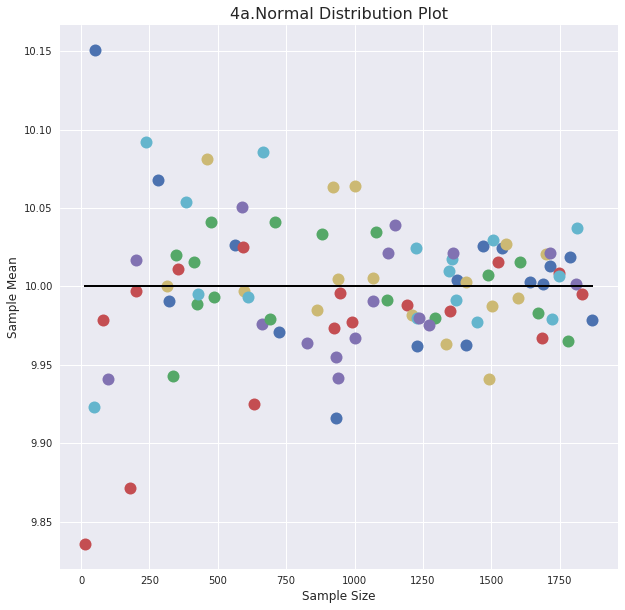

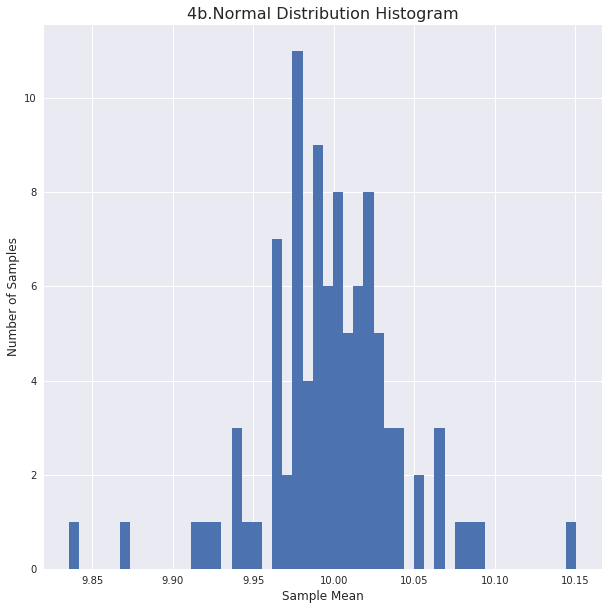

In [35]:
# Plot for Normal Distribution
DistributionND = ['gaus']

# Stating the mean, which is mymean at the beginning
NDmean = mymean

# Make an empty dictionary

ND = {}

#Define 'gaus'

ND['gaus'] = np.random.normal(NDmean, size = 100)

# Make a 'gaus' dictionary

ND['gaus'] ={}

# Using for loop for defining sample size

for a in sizeND:
    ND['gaus'][a] = np.random.normal(NDmean, size = a)

# Mean dictionary

ND['gaus']['meanND'] = {}

# Ensure the means are in string type
plotND = pl.figure(figsize=(10,10)).add_subplot(111)

for aa in ND['gaus']:
    if not type(aa) == str:
        ND['gaus']['meanND'][aa] = ND['gaus'][aa].mean()
        
        # Plotting Scatter
        # The x-axis will be sample size; y-axis will be the corresponding mean of each sample
        plotND.plot(aa, ND['gaus']['meanND'][aa], marker = 'o', markersize = 12 )
        plotND.set_xlabel('Sample Size', fontsize=12)
        plotND.set_ylabel('Sample Mean', fontsize=12)
        plotND.set_title('4a.Normal Distribution Plot', fontsize=16)
        
        # Plotting Mean line
        # The x-axis will be ranging from the min sample size to the max sample size; y-axis will be just mean
        plotND.plot([min(sizeND), max(sizeND)], [NDmean, NDmean], "k")

# Plotting histogram
NDmeans = list(ND['gaus']['meanND'].values())

pl.figure(figsize=(10, 10))
pl.hist(NDmeans, bins=50)
pl.xlabel('Sample Mean', fontsize = 12)
pl.ylabel('Number of Samples', fontsize = 12)       
pl.title('4b.Normal Distribution Histogram', fontsize = 16)
        
NDx = np.array(NDmeans).std()
print(NDx)

## Figure 4a:
According to the law of large numbers, we can see from the this plot, the larger the sample size is, the closer it's sample mean is to the expected mean. As we can see, the large-sized sample are all not too far away from the mean line. 

## Figure 4b:
The histogram is not perfectly bell-shaped which based on Central Limit Theorem, can be due to the limit of sample sizes. However, it is close to normal distribution as many samples have means that are very close to or equal to the expected mean, which is 10. We can see more concentration between 9.95 to 10.05.

# Do it for the Poisson distribution

In [36]:
##your code here...
random.seed(12345)
sizePD=(np.random.rand(100) * 2000).astype(int)
print ("Sample Size List: %s Shape: %s"%(sizePD, sizePD.shape))

Sample Size List: [1859  632  367  409 1135 1191 1929 1306 1497 1307 1495 1922   16  212  597
 1312 1619 1744 1929 1447 1284 1434  935  651  879 1459 1988 1353 1581  341
   53 1600 1807   49  983 1052 1192  103 1790 1456 1636 1000 1620  191  437
  517  936  918 1419  356 1062  335 1537 1856 1218  300  979  754 1697 1822
  767  630 1136  375  251 1375 1599 1147 1946 1268 1776  990  703 1428 1007
  451  489 1585  990 1830 1890 1066  504 1441  734  997  453  707 1301  625
 1537 1563 1704 1899  214 1821  672 1652 1796   85] Shape: (100,)


Text(0.5,1,'5b.Poisson Distribution Histogram')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


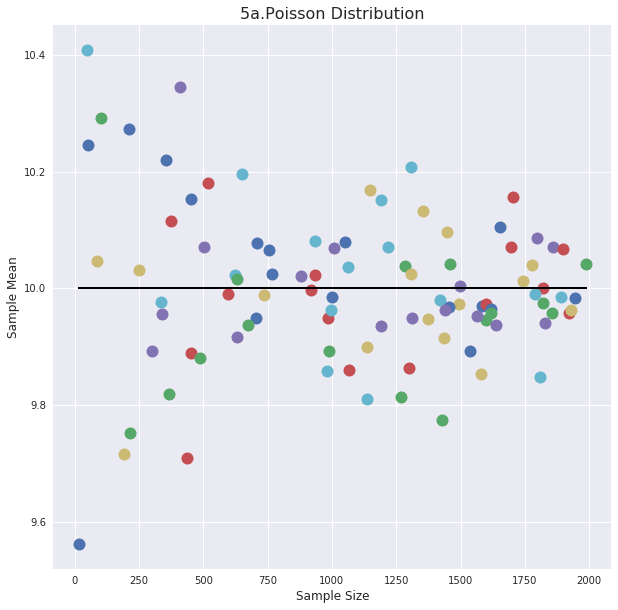

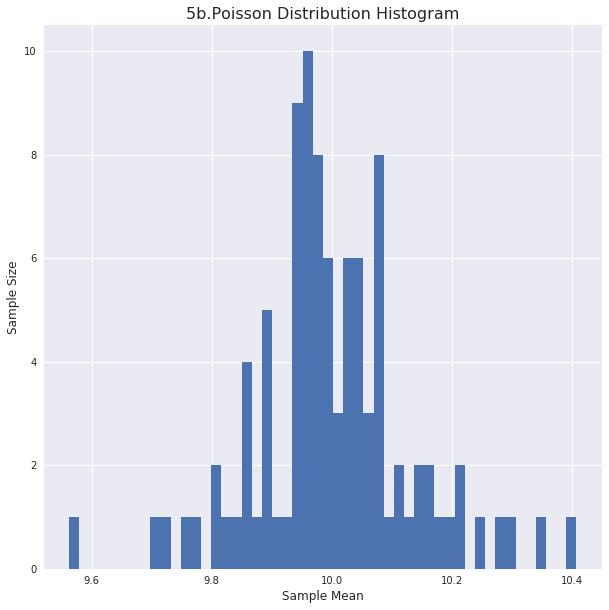

In [37]:
# Plot the poisson distribution 
distributionPD=['pois']

# Define the mean
PDmean = mymean

# Make an Open Dictionary
PD = {}

# Define 'pois'

PD['pois'] = np.random.poisson(PDmean, size = 100)

# Mamke the ['pois'] Dictionary

PD['pois'] = {}

# For loop for defining the sample size

for b in sizePD:
    PD['pois'][b] = np.random.poisson(PDmean, size = b)
    
# The mean dictionary

PD['pois']['meanPD'] = {}

# Defining the mean and start plotting 

PDplot = pl.figure(figsize=(10,10)).add_subplot(111)

for bb in PD['pois']:
    if not type(bb)==str:
        PD['pois']['meanPD'][bb] = PD['pois'][bb].mean()
# The x-axis will be sample size; y-axis will be the corresponding mean of each sample
        PDplot.plot(bb, PD['pois']['meanPD'][bb], 'o', markersize = 12)
        PDplot.set_xlabel("Sample Size", fontsize=12)
        PDplot.set_ylabel("Sample Mean", fontsize=12)
        PDplot.set_title("5a.Poisson Distribution", fontsize=16)
 # Plotting Mean line
# The x-axis will be ranging from the min sample size to the max sample size; y-axis will be just mean
        PDplot.plot([min(sizePD),max(sizePD)], [PDmean, PDmean], "k")
    
# Plotting histogram
PDmeans = list(PD['pois']['meanPD'].values())

pl.figure(figsize=(10, 10))
pl.hist(PDmeans,bins=50)
pl.xlabel('Sample Mean', fontsize = 12)
pl.ylabel('Sample Size', fontsize = 12)
pl.title('5b.Poisson Distribution Histogram', fontsize = 16)

## Figure 5a:
According to the law of large numbers, the larger the sample size is, the closer it's sample mean is to the expected mean. However, in this plot, we can see, above a certain sample size (size = 250), the sample means are all not too far away from the mean line. 


## Figure 5b:
The histogram is not perfectly bell-shaped which based on Central Limit Theorem. The mode is very close to the expected mean (10). 

# Do it for the Binomial distribution

In [38]:
##your code here...
random.seed(12345)
sizeBD=(np.random.randint(10,2000, size=100)).astype(int)
print (sizeBD, sizeBD.shape)

[ 492 1519 1319  139 1454 1459  392 1391  556 1575  779 1152 1403 1349  664
  115 1125  769 1408 1242  892  723  277 1111 1684   91 1756  176  273   53
  241   33 1063  962 1473 1321  711  363 1893  865   46  586  397  774 1158
 1679 1177  641 1877 1944 1405  347  117  399   44 1343  381 1106   15  236
  118  271 1093   93 1558 1432 1797  602  165 1328  354 1781 1039 1620 1110
 1824 1558  770  584  307 1180  700  604 1219 1848 1092  289  415 1809 1883
 1097  901  522 1764  694  451  408  420 1717 1960] (100,)


Text(0.5,1,'6b.Binomial Distribution Histogram')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


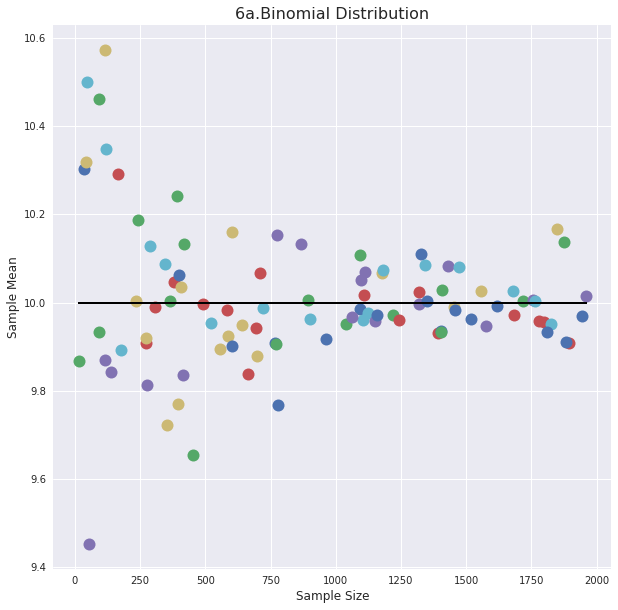

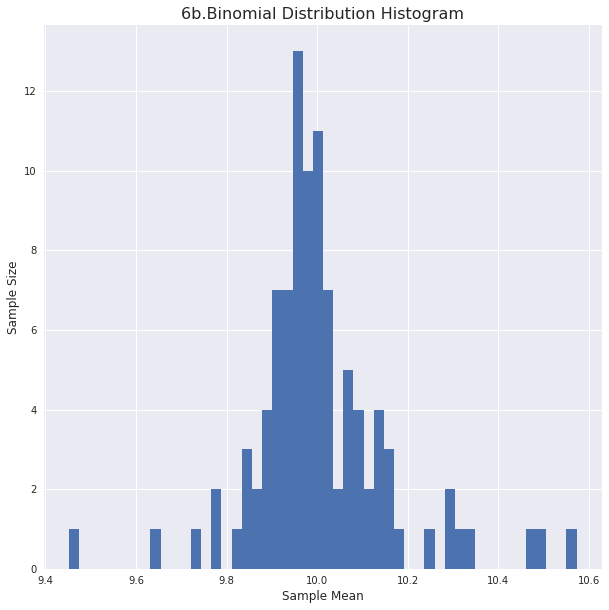

In [39]:
# Plot the binomial distribution 
distributionBD=['bino']

# Define the mean
BDmean = mymean

# Make an Open Dictionary
BD = {}

# Define 'bino'; note: np.random.binomial(testing time, probability, size); testing time * probability = mean

BD['bino'] = np.random.binomial(20, 0.5, size = 100)

# Mamke the ['bino'] Dictionary

BD['bino'] = {}

# For loop for defining the sample size

for c in sizeBD:
    BD['bino'][c] = np.random.binomial(100, 0.1, size = c)
    
# The mean dictionary

BD['bino']['meanBD'] = {}

# Defining the mean and start plotting 

BDplot = pl.figure(figsize=(10,10)).add_subplot(111)

for cc in BD['bino']:
    if not type(cc)==str:
        BD['bino']['meanBD'][cc] = BD['bino'][cc].mean()
# The x-axis will be sample size; y-axis will be the corresponding mean of each sample
        BDplot.plot(cc, BD['bino']['meanBD'][cc], 'o', markersize = 12)
        BDplot.set_xlabel("Sample Size", fontsize=12)
        BDplot.set_ylabel("Sample Mean", fontsize=12)
        BDplot.set_title("6a.Binomial Distribution", fontsize=16)
 # Plotting Mean line
# The x-axis will be ranging from the min sample size to the max sample size; y-axis will be just mean
        BDplot.plot([min(sizeBD),max(sizeBD)], [BDmean, BDmean], "k")
    
# Plotting histogram
BDmeans = list(BD['bino']['meanBD'].values())

pl.figure(figsize=(10, 10))
pl.hist(BDmeans,bins=50)
pl.xlabel('Sample Mean', fontsize = 12)
pl.ylabel('Sample Size', fontsize = 12)       
pl.title('6b.Binomial Distribution Histogram', fontsize = 16)

## Figure 6a:
According to the law of large numbers, the larger the sample size is, the closer it's sample mean is to the expected mean. In this plot, when sample size is above 500, the sample means are all not too far away from the mean line. However, the sample means do get more concentrate to the mean line when size size is growing. 


## Figure 6b:
The histogram is not perfectly bell-shaped which based on Central Limit Theorem. The mode of the sample mean is very close to the expected mean (10). The histogram is a bit left-skewed (longer tail on the left side). Even though each sample was generated by binomial distribution functions, but large amount of variables make it getting closer to normal distribution.

# Do it for another distribution - Gamma distribution

In [40]:
##your code here...
random.seed(12345)
sizeGD=(4000/np.array(range(2,102))).astype(int)
print (sizeGD, sizeGD.shape)

[2000 1333 1000  800  666  571  500  444  400  363  333  307  285  266  250
  235  222  210  200  190  181  173  166  160  153  148  142  137  133  129
  125  121  117  114  111  108  105  102  100   97   95   93   90   88   86
   85   83   81   80   78   76   75   74   72   71   70   68   67   66   65
   64   63   62   61   60   59   58   57   57   56   55   54   54   53   52
   51   51   50   50   49   48   48   47   47   46   45   45   44   44   43
   43   43   42   42   41   41   40   40   40   39] (100,)


Text(0.5,1,'7b.Gamma Distribution Histogram')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


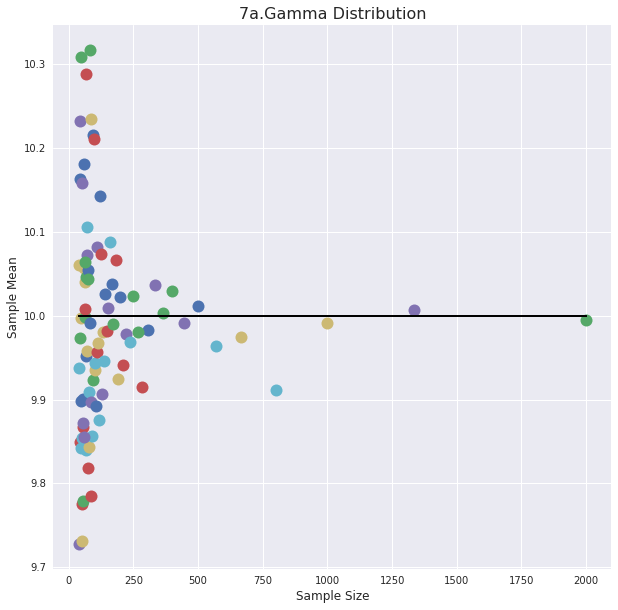

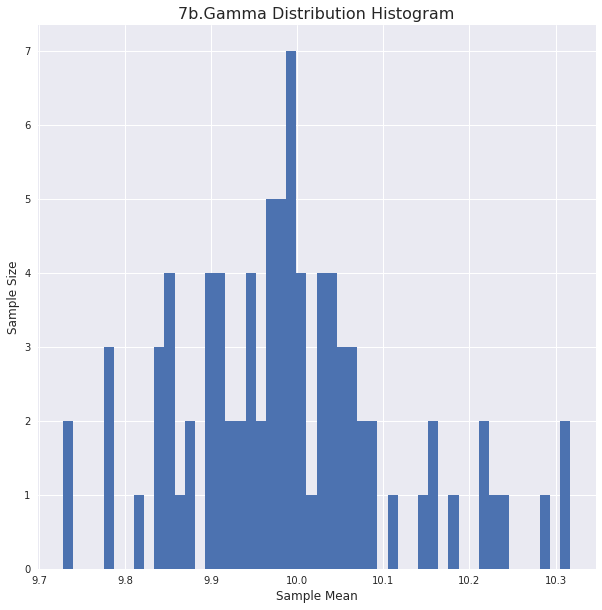

In [41]:
# Plot the  distribution 
distributionGD=['gamma']

# Define the mean
GDmean = mymean

# Make an Open Dictionary
GD = {}

# Define 'weib'
GD['gamma'] = np.random.gamma(100,0.1, size = 100)

# Mamke the ['bino'] Dictionary

GD['gamma'] = {}

# For loop for defining the sample size

for d in sizeGD:
    GD['gamma'][d] = np.random.gamma(100,0.1, size = d)
    
# The mean dictionary

    GD['gamma']['meanGD'] = {}
# Defining the mean and start plotting 

GDplot = pl.figure(figsize=(10,10)).add_subplot(111)

for dd in GD['gamma']:
    if not type(dd)==str:
        GD['gamma']['meanGD'][dd] = GD['gamma'][dd].mean()
# The x-axis will be sample size; y-axis will be the corresponding mean of each sample
        GDplot.plot(dd, GD['gamma']['meanGD'][dd], 'o', markersize = 12)
        GDplot.set_xlabel("Sample Size", fontsize=12)
        GDplot.set_ylabel("Sample Mean", fontsize=12)
        GDplot.set_title("7a.Gamma Distribution", fontsize=16)
        GDplot.plot([min(sizeGD), max(sizeGD)], [GDmean, GDmean], 'k')
    
# Plotting histogram
GDmeans = list(GD['gamma']['meanGD'].values())

pl.figure(figsize=(10, 10))
pl.hist(GDmeans,bins=50)
pl.xlabel('Sample Mean', fontsize = 12)
pl.ylabel('Sample Size', fontsize = 12)   
pl.title("7b.Gamma Distribution Histogram", fontsize = 16)

## Figure 7a:
According to the law of large numbers, the gamma plot shows that the larger the sample size is, the closer it's sample mean is to the expected mean. When sample size is larger than 250, the closer and less distributed away from the expected mean. 


## Figure 7b:
The histogram is not perfectly bell-shaped which based on Central Limit Theorem. Even though each sample was not generated by normal distribution functions, but large amount of variables make it getting closer to normal distribution.  

# Histogram for All Distritbutions

### All distributions demonstrated in one graph individually

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


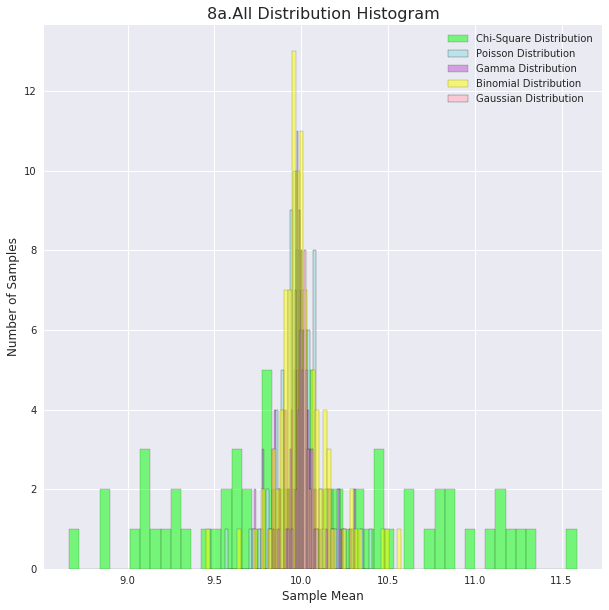

In [42]:
# Gaussian
#NDmeans = list(ND['gaus']['meanND'].values())
#allmeans = list(md['chisq']['means'].values())
pl.figure(figsize=(10, 10))

pl.hist(allmeans,bins=50, color = '#00FF00', edgecolor = 'black', alpha = 0.5, label='Chi-Square Distribution' )
pl.hist(PDmeans,bins=50, color = '#B0E0E6', edgecolor = 'black', alpha = 0.8, label='Poisson Distribution' )
pl.hist(GDmeans, bins=50, color = '#BA55D3', edgecolor = 'black', alpha = 0.5, label='Gamma Distribution' )
pl.hist(BDmeans, bins=50, color = '#FFFF00', edgecolor = 'black', alpha = 0.5, label='Binomial Distribution')
pl.hist(NDmeans, bins=50, color = '#FFC0CB', edgecolor = 'black', alpha = 0.8, label='Gaussian Distribution')

pl.xlabel('Sample Mean', fontsize = 12)
pl.ylabel('Number of Samples', fontsize = 12)       
pl.title('8a.All Distribution Histogram', fontsize = 16)
pl.legend()

## Figure 8a:
Once all the 5 distributions are together in one histogram, but plotted seperately, we can see that the chi-square distribution has a larger range than other distributions. Poisson is relatively a bit more skewed and less spreaded. Generally, the same means are more concentrated towards 10.0 which is the expected mean. If looking directly, in general, the shape is relatively bell-shaped symmetrical. 

### All distributions demonstrated in one graph all together

Text(0.5,1,'8.All Means Distribution Histogram')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


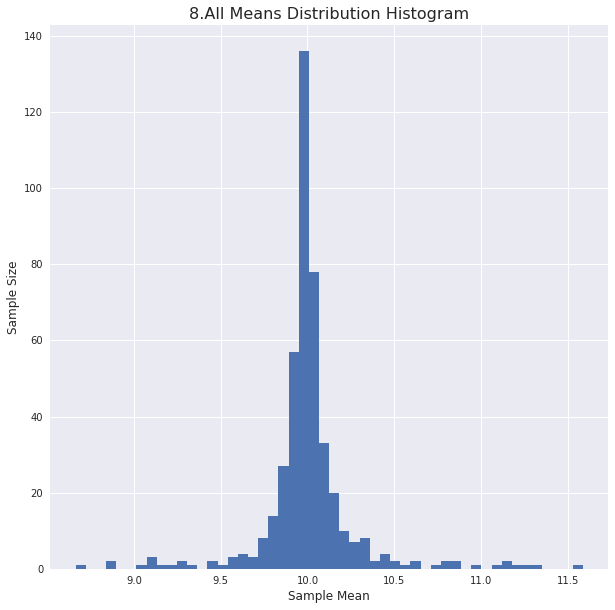

In [43]:
Popmeans = allmeans + NDmeans + PDmeans + BDmeans + GDmeans
#print(Popmeans)

pl.figure(figsize=(10, 10))
pl.hist(Popmeans,bins=50)
pl.xlabel('Sample Mean', fontsize = 12)
pl.ylabel('Sample Size', fontsize = 12)   
pl.title("8.All Means Distribution Histogram", fontsize = 16)

## Figure 8b:
Once all the samples are combined together, the shape of the histogram is getting closer to normal distribution as more variables are added. Even though may samples are generated from non-Gaussian distribution sets, when putting together, the shape is close to bell-curved and relatively more symmetrical. 

# Extra Credit - FIT Gaussian into distributions

### Chi-Square Histogram with Gaussian line

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


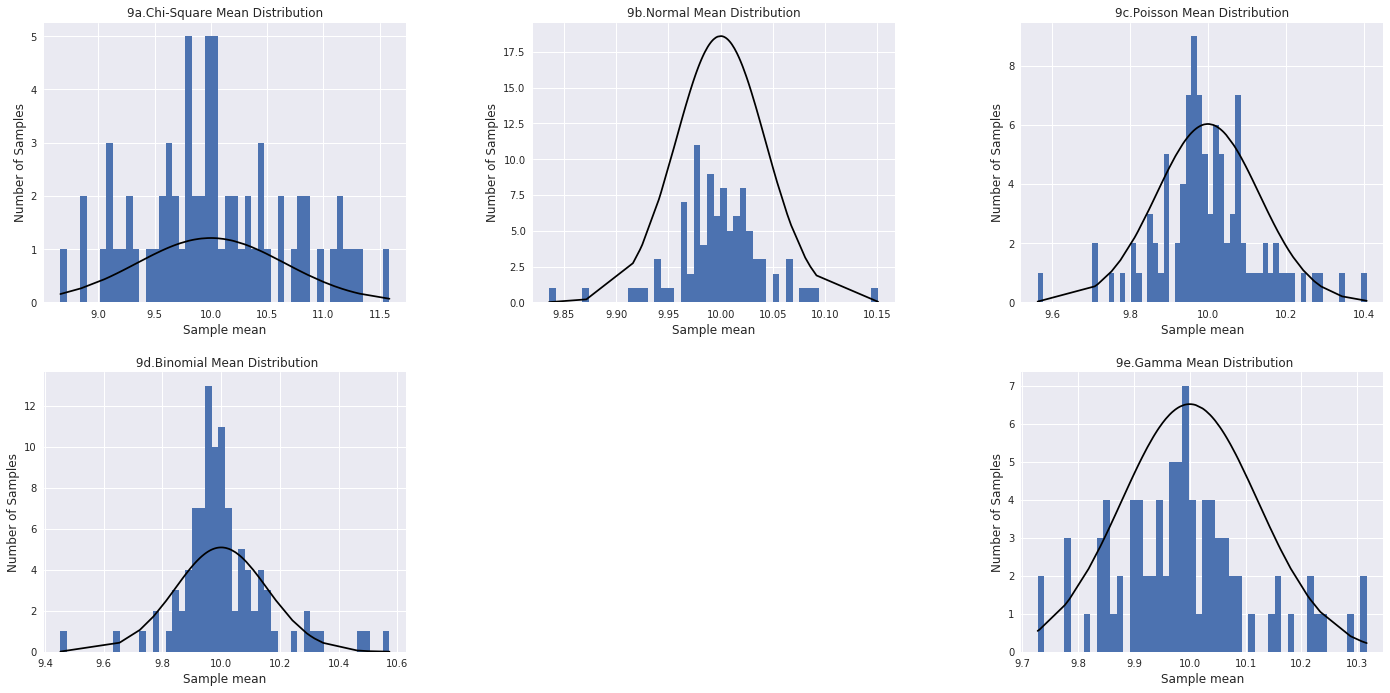

In [44]:
from scipy.stats import norm
Dplot = pl.figure(figsize=(24,18))
# Chi-Square Histogram
allmeans = list(md['chisq']['means'].values())
setchi = Dplot.add_subplot(3,3,1)
setchi.hist(allmeans,bins=50)
setchi.set_xlabel('Sample mean', fontsize = 12)
setchi.set_ylabel('Number of Samples', fontsize = 12)
setchi.set_title('9a.Chi-Square Mean Distribution')
x = np.array(sorted(allmeans))
std = sqrt(mean(abs(x - x.mean())**2))
y = norm.pdf(x, mymean, std)
setchi.plot(x, y*2, 'k')


# Gaussian Histogram with Gaussian Line

allmeansN = list(ND['gaus']['meanND'].values())
setnor = Dplot.add_subplot(3,3,2)
setnor.hist(allmeansN,bins=50)
setnor.set_xlabel('Sample mean', fontsize = 12)
setnor.set_ylabel('Number of Samples', fontsize = 12)
setnor.set_title('9b.Normal Mean Distribution')
xN = np.array(sorted(allmeansN))
stdN = sqrt(mean(abs(xN - xN.mean())**2))
yN = norm.pdf(xN, mymean, stdN) 

setnor.plot(xN, yN*2, 'k')


# Poisson Distribution with Gaussian Line
allmeansP = list(PD['pois']['meanPD'].values())
setpoi = Dplot.add_subplot(3,3,3)
setpoi.hist(allmeansP,bins=60)
xP = np.array(sorted(allmeansP))
setpoi.set_xlabel('Sample mean', fontsize = 12)
setpoi.set_ylabel('Number of Samples', fontsize = 12)
setpoi.set_title('9c.Poisson Mean Distribution')
#xP = np.linspace(min(allmeansP), max(allmeansP), 100)

stdP = sqrt(mean(abs(xP - xP.mean())**2))
yP = norm.pdf(xP, mymean, stdP) 
setpoi.plot(xP, yP*2, 'k')

# Binomial Distribution with Gaussian Line
allmeansB = list(BD['bino']['meanBD'].values())
setbin = Dplot.add_subplot(3,3,4)
setbin.hist(allmeansB,bins=50)
setbin.set_xlabel('Sample mean', fontsize = 12)
setbin.set_ylabel('Number of Samples', fontsize = 12)
setbin.set_title('\n 9d.Binomial Mean Distribution')
xB = np.array(sorted(allmeansB))
stdB = sqrt(mean(abs(xB - xB.mean())**2))
yB = norm.pdf(xB, mymean, stdB)
setbin.plot(xB, yB*2, 'k')

# Gamma Distribution with Gaussain Line 
allmeansG = list(GD['gamma']['meanGD'].values())
setgam = Dplot.add_subplot(3,3,6)
setgam.hist(allmeansG,bins=50)
setgam.set_xlabel('Sample mean', fontsize = 12)
setgam.set_ylabel('Number of Samples', fontsize = 12)
setgam.set_title('\n 9e.Gamma Mean Distribution')
xG = np.array(sorted(allmeansG))
stdG = sqrt(mean(abs(xG - xG.mean())**2))
yG = norm.pdf(xG, mymean, stdG)
setgam.plot(xG, yG*2, 'k')

# Subplot arrangement: https://matplotlib.org/gallery/pyplots/pyplot_scales.html#sphx-glr-gallery-pyplots-pyplot-scales-py
Dplot.subplots_adjust(hspace=0.25, wspace=0.35)


# Figure 9: 

A Gaussian line was obtained through: collecting the means from all the distributions and obtain the normalized probability through norm.pdf command. The * 2 scale is for better demonstration as the y obtained are normalized probability which is normally small. After Gaussian being added, it's easier to analyze how close the distribution of each set is to the normal distribution when the means of each samples are following Gaussian distribution. The number of samples are the same for all five sets but the sample sizes are different which affects the result patterns based on Central Limit Theorem and Law of Large numbers as they both states large amount of samples/variables contributes to shape being normalized or closer to expected means. 

### All Distribution Histogram with Gaussian line

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


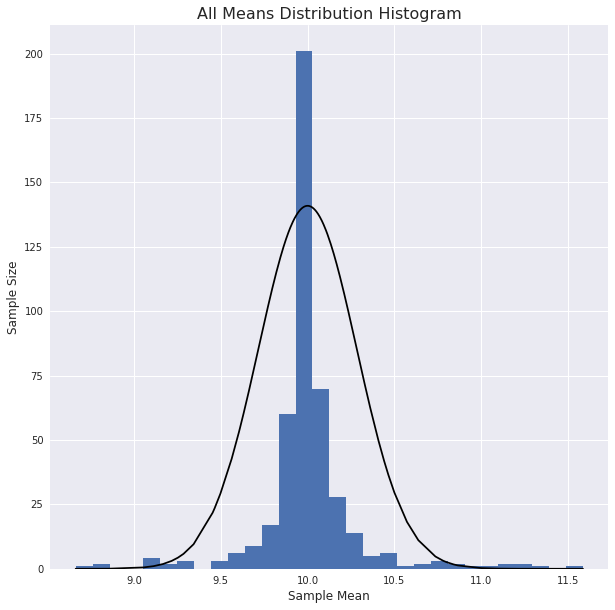

In [45]:
Popmeans = allmeans + NDmeans + PDmeans + BDmeans + GDmeans

pl.figure(figsize=(10, 10))
pl.hist(Popmeans,bins=30)
pl.xlabel('Sample Mean', fontsize = 12)
pl.ylabel('Sample Size', fontsize = 12)   
pl.title("All Means Distribution Histogram", fontsize = 16)

#Adding the Gaussian line
    # Get a normalized mean distribution for all the sample means(allmeans)
    # In the x-axis, it will be np.linspace(start, stop, sample size)
        # Reference: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linspace.html
        # Reference: http://firsttimeprogrammer.blogspot.com/2014/07/how-to-fit-data-to-normal-distribution.html

xA = np.array(sorted(Popmeans))

    # Getting a normalized standard deviation
        # Reference: https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html
stdA = sqrt(mean(abs(xA - xA.mean())**2))
    # In the y-axis, it will be normalized probability of x, keeping the population mean the same. 
    # I used *100 as the return of y would be between 0 to 1 (probability ratio) so times 10 would bring to a regular number. 
        # Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
yA = norm.pdf(xA, mymean, stdA) * 100
pl.plot(xA, yA, 'k')
pl.show()

## Figure 10: 
After add the Gaussian line as a reference, we can see that the shape is similar to the bell-curved Gaussian line. 